# Job Hunt Analysis

### Import Libraries

In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from PIL import *
from math import sin, cos, sqrt, atan2, radians

In [24]:
import nltk
from nltk import FreqDist
from wordcloud import WordCloud 
from nltk.corpus import RegexpTokenizer as regextoken
from nltk.corpus import stopwords

In [104]:
df=pd.read_csv("C:\\Users\\Owner\\Downloads\\College\\Practice\\Job_Progress.csv",encoding= 'unicode_escape')

In [105]:
df.shape

(39, 22)

### Skills

In [27]:
# Convert to string
df["Skills"] = df["Skills"].astype(str)
# Convert text to lower case
df["Skills"] = df["Skills"].apply(lambda x: x.lower())
# Creating a regular expression tokenizer that matches only alphabets
# This will return separate words (tokens) from the text
tokenizer = regextoken("[a-zA-Z]+")
# Apply the tokenizer to each row of the reviews
skills_tokens = df["Skills"] = df["Skills"].apply(tokenizer.tokenize)

In [28]:
# Import the English stopwords directory 
stop = stopwords.words("english")
stop.extend(["years", "nan","strong","knowledge","using","etc","skills","ability","environment"])

In [29]:
# Removing stopwords from the tokens
skills_tokens = skills_tokens.apply(lambda x: [token for token in x if token not in stop])
# Concatenating all the reviews 
all_skills = skills_tokens.astype(str).str.cat()
cleaned_skills = tokenizer.tokenize(all_skills)

In [30]:
# Get the frequency distribution of individual words in the skills
fd = FreqDist()
for word in cleaned_skills:
    fd[word] += 1
    
# Examining the top 5 most frequent words
fd.most_common(20)

[('experience', 55),
 ('data', 46),
 ('sql', 26),
 ('python', 18),
 ('analysis', 13),
 ('management', 12),
 ('development', 11),
 ('business', 11),
 ('tools', 10),
 ('technical', 9),
 ('communication', 9),
 ('systems', 9),
 ('database', 8),
 ('programming', 8),
 ('science', 8),
 ('software', 7),
 ('javascript', 7),
 ('g', 7),
 ('methodologies', 7),
 ('project', 7)]

In [31]:
# Extract only the words
skills_list = [item[0] for item in fd.most_common(30)]
text = str(skills_list)

### Word Cloud-Skills

In [33]:
bulb_mask = np.array(Image.open("C:/Users/Owner/Downloads/College/Practice/Job Hunt/bulb.png"))

In [34]:
# function to swap number 0 to 255 for any image
def transform_any_image_format(val):
    if val.any() == 0:
        return 255
    elif val.any() == 1 :
        return 1
    elif val.any()!=0:
        return 255
    else:
        return val
    
# Transform your mask into a new one that will work with the function:
def new_mask(image_mask):
    transformed_mask = np.ndarray((image_mask.shape[0],image_mask.shape[1]), np.int32)

    for i in range(len(image_mask)):
        transformed_mask[i] = list(map(transform_any_image_format, image_mask[i]))
    
    return transformed_mask

In [35]:
transformed_bulb_mask=new_mask(bulb_mask)

In [36]:
# Create a word cloud image
wc = WordCloud(font_path='C:/Users/Owner/Downloads/College/Capstone Project/cabinsketch/CabinSketch-Bold.ttf',background_color="black", max_words=1000, 
               mask=transformed_bulb_mask, contour_width=3,width=1600,height=900,colormap=matplotlib.cm.inferno).generate(str(skills_list))

(-0.5, 1785.5, 2399.5, -0.5)

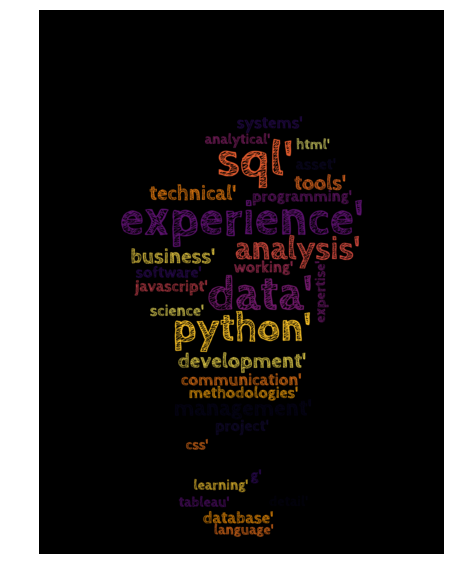

In [37]:
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [106]:
wc.to_file("C:\\Users\\Owner\\Downloads\\College\\Practice\\wordcloud_bulb.png")

### Location

In [106]:
df.columns

Index(['ID', 'Company', 'Longitude', 'Latitude', 'Portal', 'Company Addresss',
       'Position', 'Website', 'Password Required', 'userId', 'Password',
       'Status', 'Cover Letter', 'Applied On', 'Result Date', 'Job Type',
       'Area', 'Province', 'Country', 'Skills', 'Responsibilities', 'Pay'],
      dtype='object')

In [107]:
#restricting job search to Vancouver,BC ,Canada
map_df=df[(df['Country']=='Canada') & (df['Province']=='BC') & (df['Area']=='Vancouver')]

In [109]:
#Calculating the max and min Latitude/ Longitude
BBox = (map_df.Longitude.min(),   map_df.Longitude.max(),map_df.Latitude.min(), map_df.Latitude.max())
print(" Longitude Minimum: ",map_df.Longitude.min(),"\n","Longitude Maximum: ",map_df.Longitude.max(),"\n",
      "Latitude Minimum: ",map_df.Latitude.min(),"\n", "Latitude Maximum: ",map_df.Latitude.max())

 Longitude Minimum:  -123.25263999999999 
 Longitude Maximum:  -123.00691 
 Latitude Minimum:  49.19704 
 Latitude Maximum:  49.31201


https://www.openstreetmap.org/

In [110]:
# Read the image exported from opentree.org
van_m = plt.imread('C:/Users/Owner/Downloads/College/Practice/Job Hunt/map.png')

In [180]:
# Find out the maximum latitude and longitude and Id of a job location which farthest from home.
dis=[]
max_dis=0
loc_Id=0

max_lat=0
max_lon=0

for ID,lat,lon in zip(map_df.ID, map_df.Latitude, map_df.Longitude):
    # approximate radius of earth in km
    R = 6373.0
    
    lat1 = radians(49.235000)
    lon1 = radians(-123.111610)
    
    lat2 = radians(lat)
    lon2 = radians(lon)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    if distance>max_dis:
        max_dis=distance
        loc_Id=ID
        max_lat=lat
        max_lon=lon
    dis.append(round(distance,2))

max_dis=str(max(dis))+' KM'

In [181]:
max_dis

'10.67 KM'

In [160]:
map_df[map_df['ID']==loc_Id]

,ID,Company,Longitude,Latitude,Portal,Company Addresss,Position,Website,Password Required,userId,...,Cover Letter,Applied On,Result Date,Job Type,Area,Province,Country,Skills,Responsibilities,Pay
34,35,ASEQ,-123.25264,49.26192,Indeed,"Vancouver, BC V6T 1Z4",Business Analyst,https://www.aseq.ca/,NaN,NaN,...,No,28-Apr,NaN,Full Time,Vancouver,BC,Canada,"Social skills, ability to engage with people\n...",In collaboration with Partnerships and Develop...,NaN


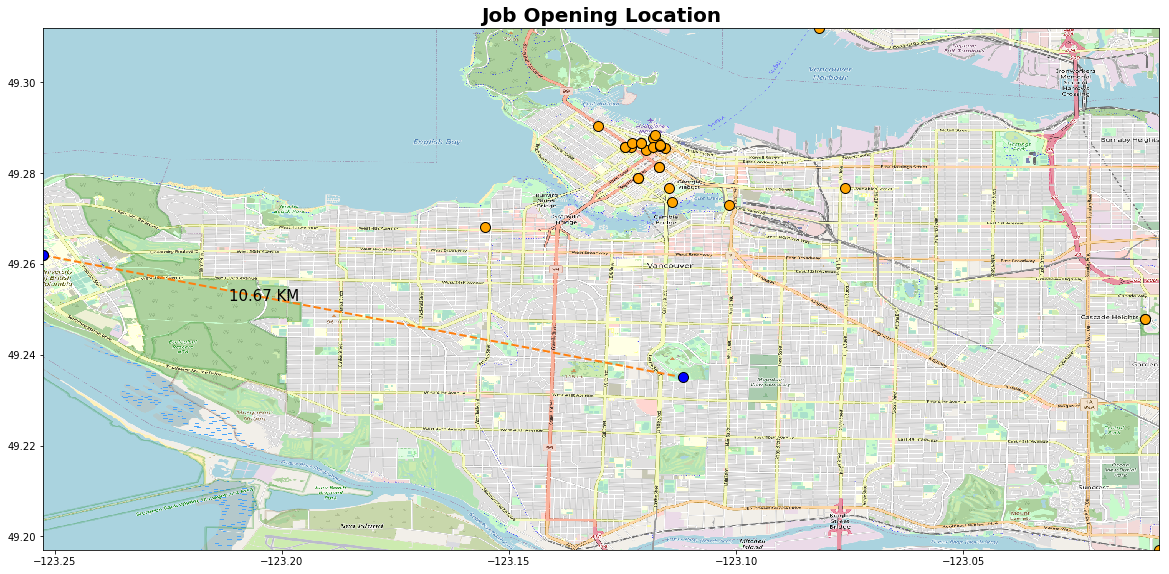

In [193]:
fig, ax = plt.subplots(figsize = (20,10))

plt.xlim(BBox[0],BBox[1])
plt.ylim(BBox[2],BBox[3])
plt.imshow(van_m,zorder=0, extent = BBox)
plt.plot(map_df.Longitude,map_df.Latitude,linestyle='none',marker='o', 
         markerfacecolor='orange', markersize=10, markeredgecolor="black")

# 49.235000, -123.111610 Home Coordinate
x = [max_lat,49.235000] 
y = [max_lon,-123.111610] 

plt.plot(y, x, linestyle='--',marker='o', markerfacecolor='blue', markeredgecolor="black", markersize=10, linewidth=2) 
ax.text(-123.211610,49.252000,max_dis, fontsize=15)

plt.title("Job Opening Location",fontsize=20,fontweight='bold')
plt.savefig("C:\\Users\\Owner\\Downloads\\College\\Practice\\Job Hunt\\job_map.png")
plt.show()


<Figure size 432x288 with 0 Axes>